<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/lab_solutions/Labs/lab12_diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: diffusion models. SOLUTIONS

We're going to look at diffusion models, using the new hugging face [`diffusion` package](https://pypi.org/project/diffusers/)

This wraps many variants of diffusion models, such as the `DDPM` pipline (after the influential [Denoising Diffusion Probabilistic Models](https://proceedings.neurips.cc/paper_files/paper/2020/file/4c5bcfec8584af0d967f1ab10179ca4b-Paper.pdf) Ho et al. NeurIPS 2020 paper), as well as `DDIM`, `PNDM` and `PNDM`

Your task for this lab is to generate a sequence of images that start with a random normal 256 x 256 image and ends up with a celebrity face.

I **highly** suggest you follow the tutorial at https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb

**Deliverable** for Canvas:
- turn in a PDF of your notebook, showing some images, starting with random noise and ending up with a celebrity

## SOLUTIONS:
This is just modified from the huggingface demo at https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb except we use `google/ddpm-celebahq-256` instead of `google/ddpm-church-256

In [10]:
import PIL.Image
import numpy as np
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print('using GPU')

def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

# from https://pypi.org/project/diffusers/
# !pip install diffusers  # (if not installed, but it is pre-installed on colab)

from diffusers import UNet2DModel


# model_id = "google/ddpm-cifar10-32"
# model_id = "google/ddpm-church-256"
model_id = "google/ddpm-celebahq-256"

model = UNet2DModel.from_pretrained(model_id).to(device)

# For lower-level control, we'll use schedulers
from diffusers import DDPMScheduler, DDIMScheduler

# For a high-level interface that wraps everything together, you could use a "Pipeline",
#   but for our demo we'll want lower-level control
# from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline, DiffusionPipeline
# "Note that while the ddpm scheduler yields the highest quality, it also takes the longest.
# For a good trade-off between quality and inference speed you might want to consider the ddim or pndm schedulers instead."
# The "DiffusionPipline" is a generic version you can use
# load model and scheduler together
# image_pipe = DDPMPipeline.from_pretrained(model_id)
# image_pipe.to(device) # if running with a GPU

using GPU


An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [12]:
%%time
# (this is about 1 sec or less on GPU, or 10 sec on CPU)
noisy_sample = torch.randn(
    1, model.config.in_channels, model.config.sample_size, model.config.sample_size
).to(device)
# noisy_sample.shape # 1 x 3 x 256 x 256
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 28.4 ms


In [13]:
scheduler = DDPMScheduler.from_config(model_id)

# scheduler = DDIMScheduler.from_config(model_id)
# scheduler.set_timesteps(num_inference_steps=50)

## Here's the main stuff:

  5%|▍         | 49/1000 [00:06<01:56,  8.16it/s]

'Image at step 50'

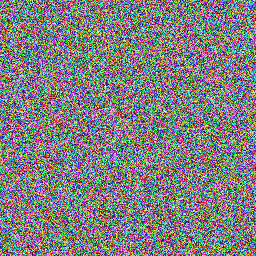

 10%|▉         | 99/1000 [00:12<01:53,  7.95it/s]

'Image at step 100'

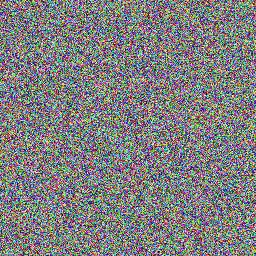

 15%|█▍        | 149/1000 [00:18<01:46,  7.96it/s]

'Image at step 150'

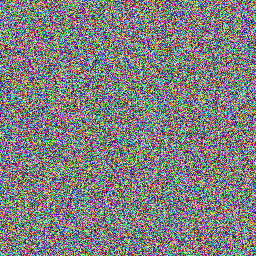

 20%|█▉        | 199/1000 [00:25<01:42,  7.84it/s]

'Image at step 200'

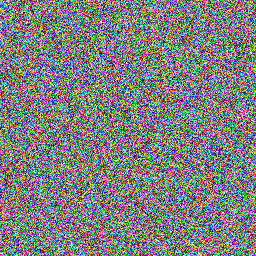

 25%|██▍       | 249/1000 [00:31<01:37,  7.67it/s]

'Image at step 250'

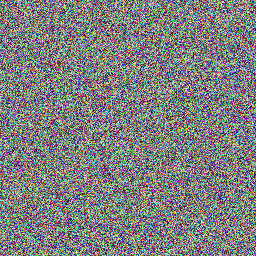

 30%|██▉       | 299/1000 [00:38<01:32,  7.60it/s]

'Image at step 300'

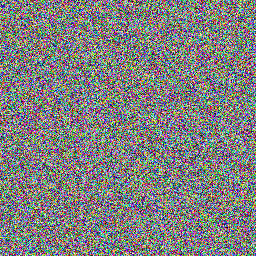

 35%|███▍      | 349/1000 [00:44<01:26,  7.53it/s]

'Image at step 350'

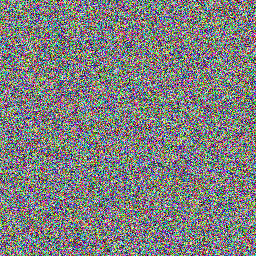

 40%|███▉      | 399/1000 [00:51<01:19,  7.60it/s]

'Image at step 400'

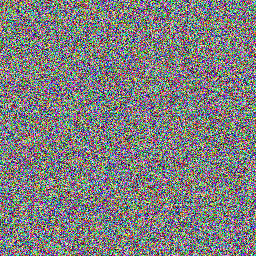

 45%|████▍     | 449/1000 [00:58<01:09,  7.90it/s]

'Image at step 450'

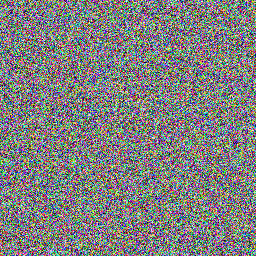

 50%|████▉     | 499/1000 [01:04<01:04,  7.75it/s]

'Image at step 500'

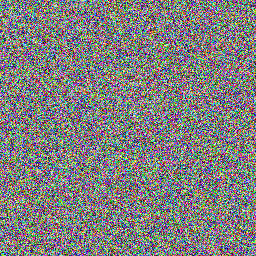

 55%|█████▍    | 549/1000 [01:11<00:55,  8.06it/s]

'Image at step 550'

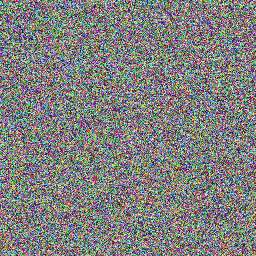

 60%|█████▉    | 599/1000 [01:17<00:51,  7.85it/s]

'Image at step 600'

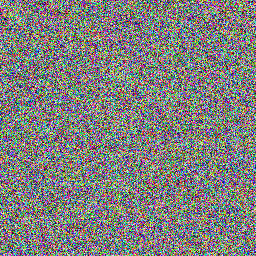

 65%|██████▍   | 649/1000 [01:24<00:44,  7.87it/s]

'Image at step 650'

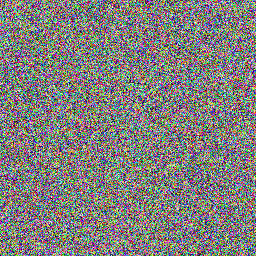

 70%|██████▉   | 699/1000 [01:30<00:41,  7.24it/s]

'Image at step 700'

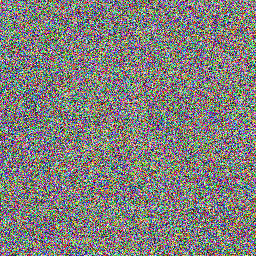

 75%|███████▍  | 749/1000 [01:37<00:31,  7.87it/s]

'Image at step 750'

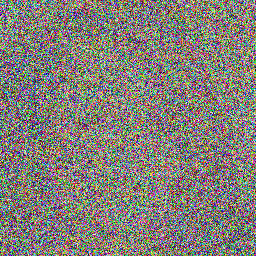

 80%|███████▉  | 799/1000 [01:43<00:25,  7.77it/s]

'Image at step 800'

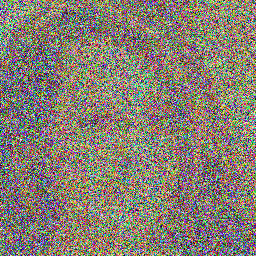

 85%|████████▍ | 849/1000 [01:50<00:19,  7.76it/s]

'Image at step 850'

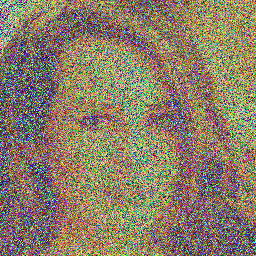

 90%|████████▉ | 899/1000 [01:56<00:12,  7.96it/s]

'Image at step 900'

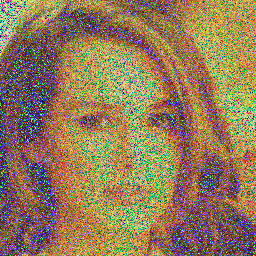

 95%|█████████▍| 949/1000 [02:03<00:06,  7.97it/s]

'Image at step 950'

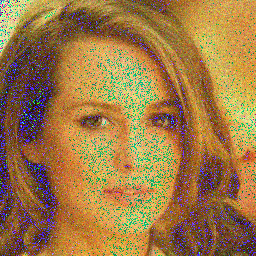

100%|█████████▉| 999/1000 [02:09<00:00,  7.80it/s]

'Image at step 1000'

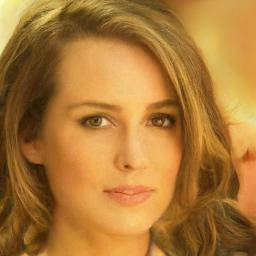

100%|██████████| 1000/1000 [02:09<00:00,  7.71it/s]


In [14]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
      residual = model(sample, t).sample

  # 2. compute less noisy image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample

  # 3. optionally look at image
  if (i + 1) % 50 == 0:
      display_sample(sample, i + 1)